In [3]:
# Import all necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [4]:
# Generate sample data.
N = 1000
np.random.seed(42)
x = np.sort(5 * np.random.rand(N, 1), axis=0)
T = np.linspace(0, 5, N)[:, np.newaxis]
y = np.sin(x).ravel()
y_orig = np.sin(x).ravel()

# Add noise to targets.
y += 0.1*np.random.randn(N)

# Shuffle samples.
idx = np.random.permutation(N)
x_per = x[idx]
y_per = y[idx]

In [5]:
# Split data into train and test subsets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [6]:
# Set parameters for grid-search.
param_grid = [{'weights': ['uniform', 'distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]}]

# Instantiate k-NN class.
reg = KNeighborsRegressor()
grid_search = GridSearchCV(reg, param_grid, cv=5, verbose=3, n_jobs=-1)

# Find best hyperparameters.
grid_search.fit(x_per, y_per)

Fitting 5 folds for each of 52 candidates, totalling 260 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 253 out of 260 | elapsed:   13.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 260 out of 260 | elapsed:   13.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'weights': ['uniform', 'distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [7]:
grid_search.best_params_

{'n_neighbors': 26, 'weights': 'uniform'}

In [8]:
grid_search.best_score_

0.9797042004379337

In [9]:
best_params_ = list(grid_search.best_params_.values())

In [10]:
# Instantiate a new Regressor with the optimum hyperparameters.
clf = KNeighborsRegressor(n_neighbors=best_params_[0], weights=best_params_[1])
# Train the classifier with the training set only.
clf.fit(x_train, y_train)

# Prediction.
y_pred = clf.predict(x_test)

print('MSE: ', mean_squared_error(y_test, y_pred))

MSE:  0.010497197318489011


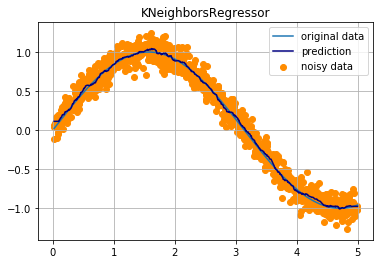

In [11]:
y_ = clf.predict(x)

plt.figure()
plt.scatter(x, y, color='darkorange', label='noisy data')
plt.plot(x, y_orig, label='original data')
#plt.plot(T, y_, color='navy', label='prediction')
plt.plot(x, y_, color='navy', label='prediction')
plt.axis('tight')
plt.legend()
plt.title('KNeighborsRegressor')
plt.grid()
plt.show()